<a href="https://colab.research.google.com/github/fahmimnalfrzki/H8_SCL_2022_SNA/blob/main/H8_SCL_2022_Social_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If you want to use NetworkX on Google Colab, please install it first before you go further since Google Colab doesn't provide it.

In [1]:
!pip install -q networkx

We only use networkx, matplotlib, and pandas for this materials

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Basic NetworkX

## Making Graph

In order to make a graph, you need to define the Graph using nx.Graph for undirected graph. Furthermore, you can use nx.DiGraph() for directed graph.

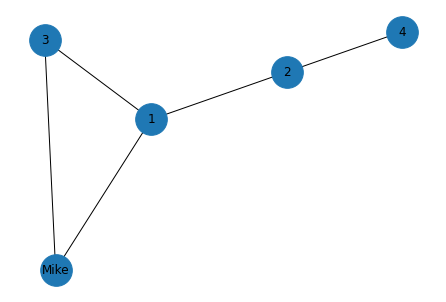

In [3]:
G = nx.Graph()

G.add_node(1)
G.add_nodes_from([2,3,4,'Mike'])

G.add_edge(1,2)
G.add_edges_from([(1,3),(3,'Mike'),(4,2),('Mike',1),(1,'Mike')])

nx.draw(G, with_labels=True, node_size=1000)

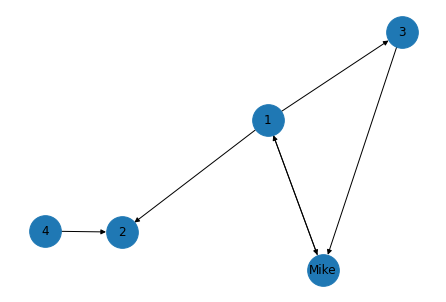

In [4]:
G = nx.DiGraph()

G.add_node(1)
G.add_nodes_from([2,3,4,'Mike'])

G.add_edge(1,2)
G.add_edges_from([(1,3),(3,'Mike'),(4,2),('Mike',1),(1,'Mike')])

nx.draw(G, with_labels=True, node_size=1000)

You can see that the difference between Directed and Undirected is only at the edge. Directed graph is clear enough that the arrows show the direction of communication.

Note that the graph position/layout is always change everytime you run the code and it hasn't any meaning.

## Weighted Graph

As you see on the slide, we can define the edge weight. However, the weight doesn't affect the graph directly. It only affects the visualization if you define it into size or color.

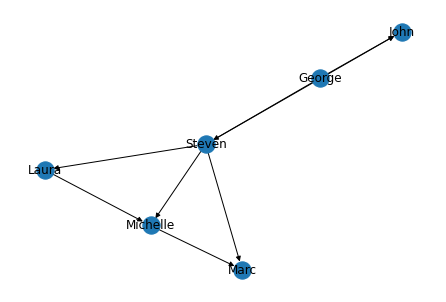

In [5]:
G_weighted = nx.DiGraph()

G_weighted.add_edge('Steven',  'Laura',   weight=25)
G_weighted.add_edge('Steven',  'Marc',    weight=8)
G_weighted.add_edge('Steven',  'John',    weight=11)
G_weighted.add_edge('Steven',  'Michelle',weight=1)
G_weighted.add_edge('Laura',   'Michelle',weight=1)
G_weighted.add_edge('Michelle','Marc',    weight=1)
G_weighted.add_edge('George',  'John',    weight=8)
G_weighted.add_edge('George',  'Steven',  weight=4)

nx.draw(G_weighted, with_labels=True)

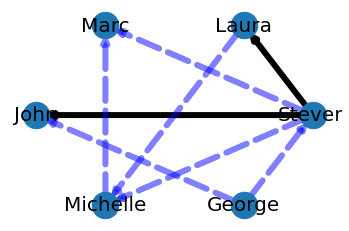

In [6]:
elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 8]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 8]

pos = nx.circular_layout(G_weighted)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=700)

# edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge,width=6)
nx.draw_networkx_edges(G_weighted, pos, edgelist=esmall,width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G_weighted, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show();

The weight is represented by edge color and line style

## Centrality Measurement

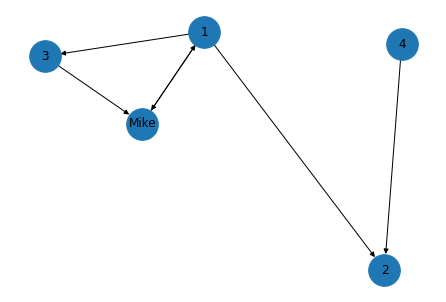

In [7]:
G = nx.DiGraph()

G.add_node(1)
G.add_nodes_from([2,3,4,'Mike'])

G.add_edge(1,2)
G.add_edges_from([(1,3),(3,'Mike'),(4,2),('Mike',1),(1,'Mike')])

nx.draw(G, with_labels=True, node_size=1000)

### Node Degree

$Centrality_{degree}(v) = \frac{d_v}{|N|-1}$

In [8]:
deg_centrality = nx.degree_centrality(G)
print(deg_centrality)

{1: 1.0, 2: 0.5, 3: 0.5, 4: 0.25, 'Mike': 0.75}


In [9]:
G.degree

DiDegreeView({1: 4, 2: 2, 3: 2, 4: 1, 'Mike': 3})

Based on this metric, we know that Node-1 is the most influence node, since it has the most neighbors, which is 4.

### Eigenvector Centrality

In [10]:
deg_eigen = nx.eigenvector_centrality(G)
print(deg_eigen)

{1: 0.5067228578387646, 2: 0.3825161929744641, 3: 0.38251376836006235, 4: 1.3470080009749606e-07, 'Mike': 0.6712648690874595}


However, if we look at the eigenvector which measures the importance of a node, Mike is most important since it connect to the neighbors that have many relations.

### PageRank

In [11]:
pagerank = nx.pagerank(G)
print(pagerank)

{1: 0.3012625323054564, 2: 0.2054811791155935, 3: 0.15028900916379212, 4: 0.06493187624249658, 'Mike': 0.27803540317266157}


If we add damping factor to reduce the bias that occur on Eigenvector, Node-1 is an influencer in the community.

### Closeness Centrality

In [12]:
deg_close = nx.closeness_centrality(G)
print(deg_close)

{1: 0.3333333333333333, 2: 0.5714285714285714, 3: 0.3333333333333333, 4: 0.0, 'Mike': 0.5}


But, in terms of closeness, Node-2 is the most closest node and it could spread message efficiently

### Betweeness Centrality

In [13]:
deg_between = nx.betweenness_centrality(G)
print(deg_between)

{1: 0.25, 2: 0.0, 3: 0.0, 4: 0.0, 'Mike': 0.16666666666666666}


In terms of coverage, Node-1 has more ability to reach more nodes than Node-2.

In this example, we conclude that the influencer in this network is Node-1, according to the popularity, importance, and reachability.

# SNA in Action

We want to do a simple analytics using social network analysis that we had learned previously. We use facebook data that provided by [Stanford Large Network Dataset Collection](https://snap.stanford.edu/data/). This case is based on friend-add connection.

The dataset only consist of two columns which are source (Person 1) and target (Person 2). For confidential, the data only provide the index which represents each account.

In [14]:
fb_network = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/H8_SCL_2022_SNA/main/facebook_combined.txt',delimiter=' ',header=None)
fb_network.rename({0:'Person1',1:'Person2'},axis=1,inplace=True)

In [15]:
fb_network.head()

,Person1,Person2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [29]:
fb_network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88234 entries, 0 to 88233
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Person1  88234 non-null  int64
 1   Person2  88234 non-null  int64
dtypes: int64(2)
memory usage: 1.3 MB


In [16]:
G_fb = nx.from_pandas_edgelist(df=fb_network, source='Person1', target='Person2', create_using=nx.Graph)

In [17]:
print(nx.info(G_fb))

Graph with 4039 nodes and 88234 edges


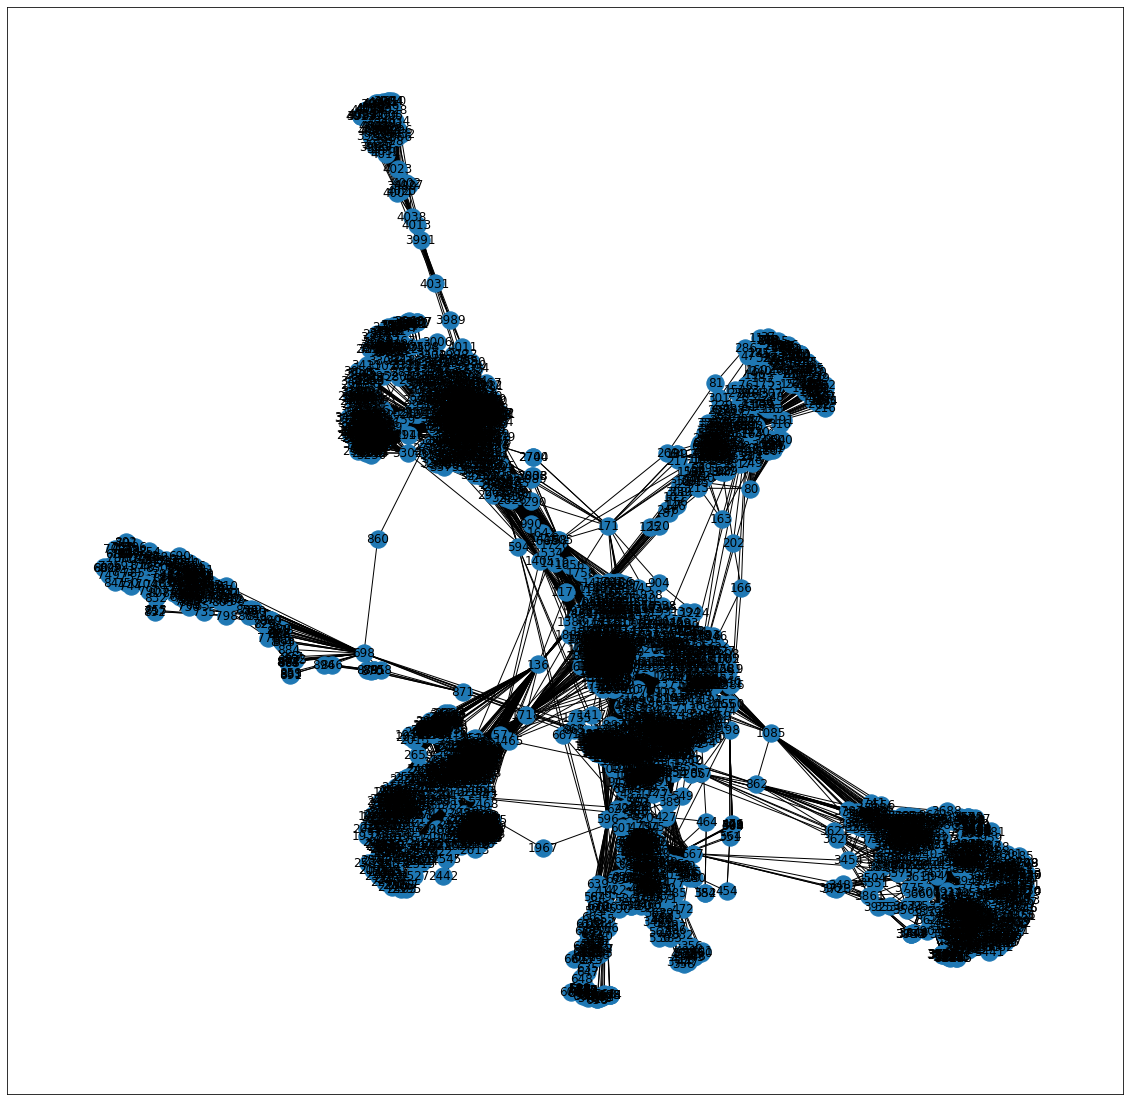

In [18]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb)

#Warning! this cell may running for 1 minute

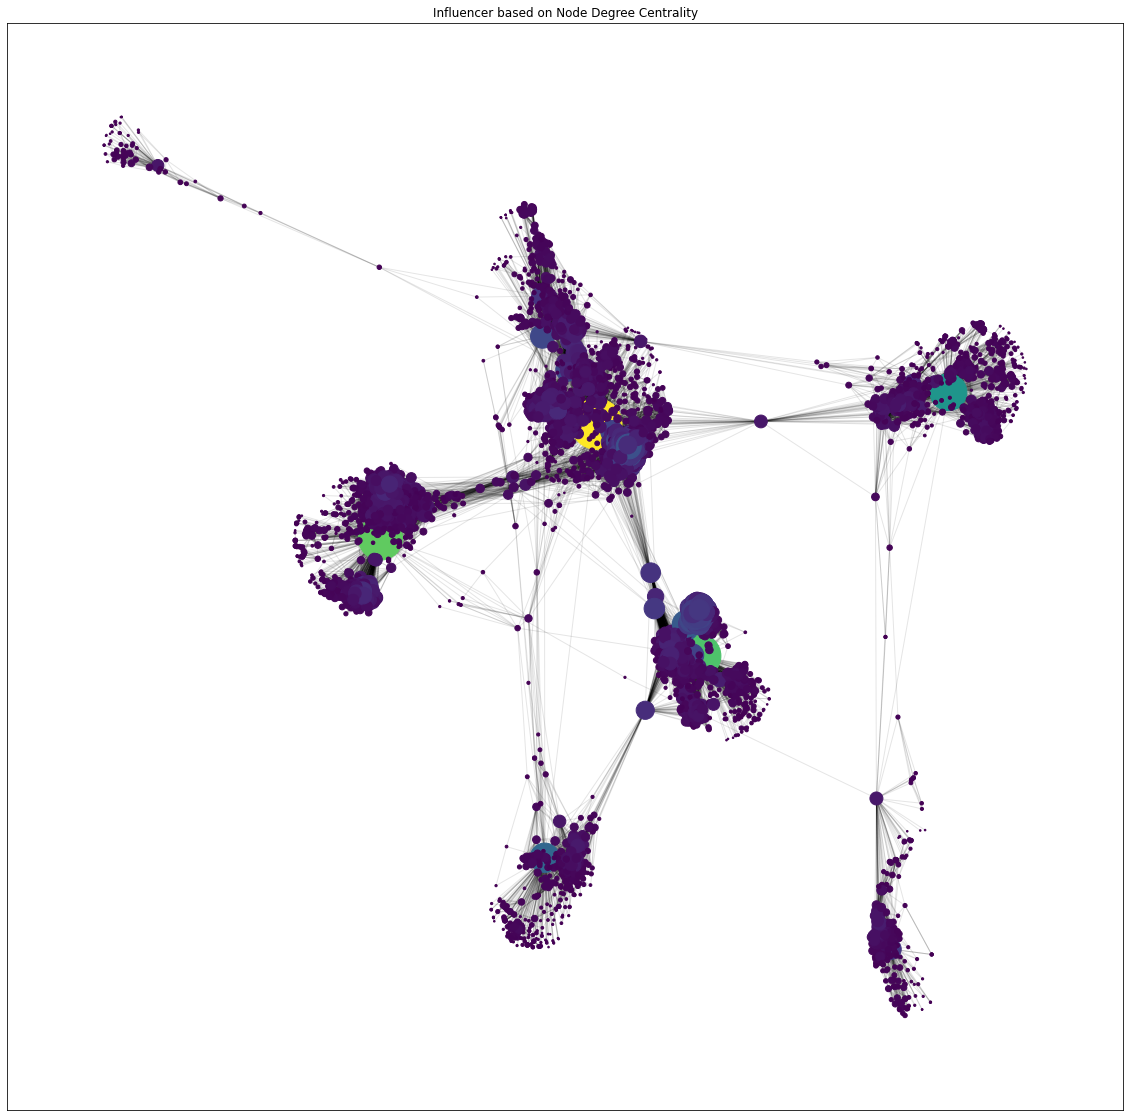

In [19]:
node_degree = nx.degree_centrality(G_fb)
pos = nx.spring_layout(G_fb)

node_color = [20000.0 * n_v for n_v in node_degree.values()]
node_size = [10000 * n_v for n_v in node_degree.values()]

plt.figure(figsize=(20,20))
plt.title('Influencer based on Node Degree Centrality')
nx.draw_networkx_nodes(G_fb, pos=pos, node_color=node_color, node_size=node_size)
nx.draw_networkx_edges(G_fb, pos=pos, alpha=0.1)

In [20]:
node_deg_sorted = sorted(node_degree, key=node_degree.get, reverse=True)[:10]

print('The most influence nodes based on node degree:')
for node in node_deg_sorted:
  print(node,'= {:.2f}'.format(node_degree[node]))

The most influence nodes based on node degree:
107 = 0.26
1684 = 0.20
1912 = 0.19
3437 = 0.14
0 = 0.09
2543 = 0.07
2347 = 0.07
1888 = 0.06
1800 = 0.06
1663 = 0.06


In [34]:
neighbors = dict(G_fb.degree)
node_deg_sorted = sorted(neighbors, key=neighbors.get, reverse=True)[:10]

print('The most connected nodes:')
for node in node_deg_sorted:
  print(node,'= {:.2f}'.format(neighbors[node]))

The most connected nodes:
107 = 1045.00
1684 = 792.00
1912 = 755.00
3437 = 547.00
0 = 347.00
2543 = 294.00
2347 = 291.00
1888 = 254.00
1800 = 245.00
1663 = 235.00


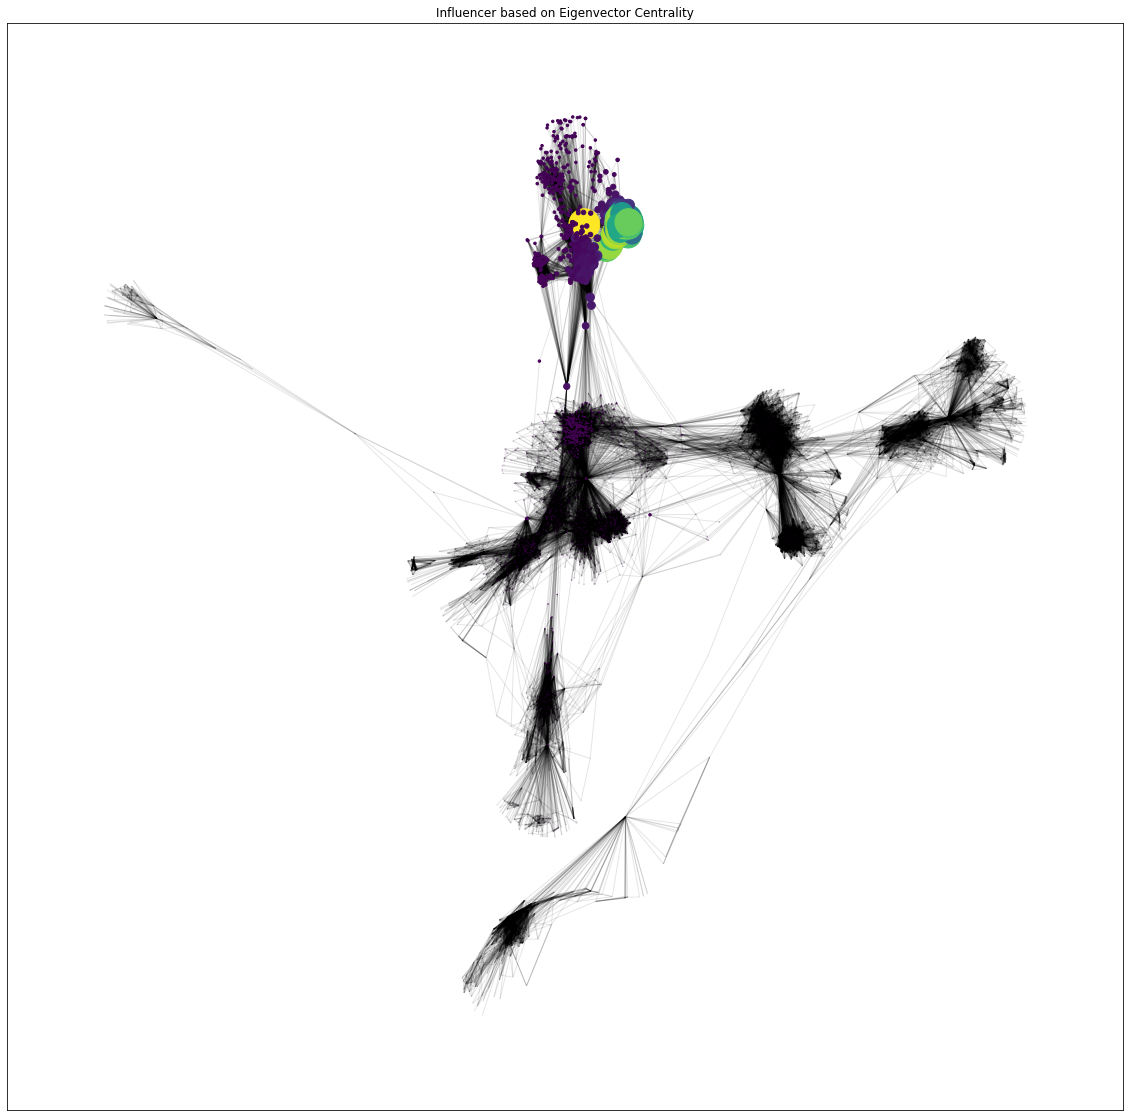

In [21]:
eigen = nx.eigenvector_centrality(G_fb)
pos = nx.spring_layout(G_fb)

node_color = [20000.0 * n_v for n_v in eigen.values()]
node_size = [10000 * n_v for n_v in eigen.values()]

plt.figure(figsize=(20,20))
plt.title('Influencer based on Eigenvector Centrality')
nx.draw_networkx_nodes(G_fb, pos=pos, node_color=node_color, node_size=node_size)
nx.draw_networkx_edges(G_fb, pos=pos, alpha=0.1)

In [22]:
eigen_sorted = sorted(eigen, key=eigen.get, reverse=True)[:10]

print('The most influence nodes based on eigenvector:')
for node in eigen_sorted:
  print(node,'= {:.2f}'.format(eigen[node]))

The most influence nodes based on eigenvector:
1912 = 0.10
2266 = 0.09
2206 = 0.09
2233 = 0.09
2464 = 0.08
2142 = 0.08
2218 = 0.08
2078 = 0.08
2123 = 0.08
1993 = 0.08


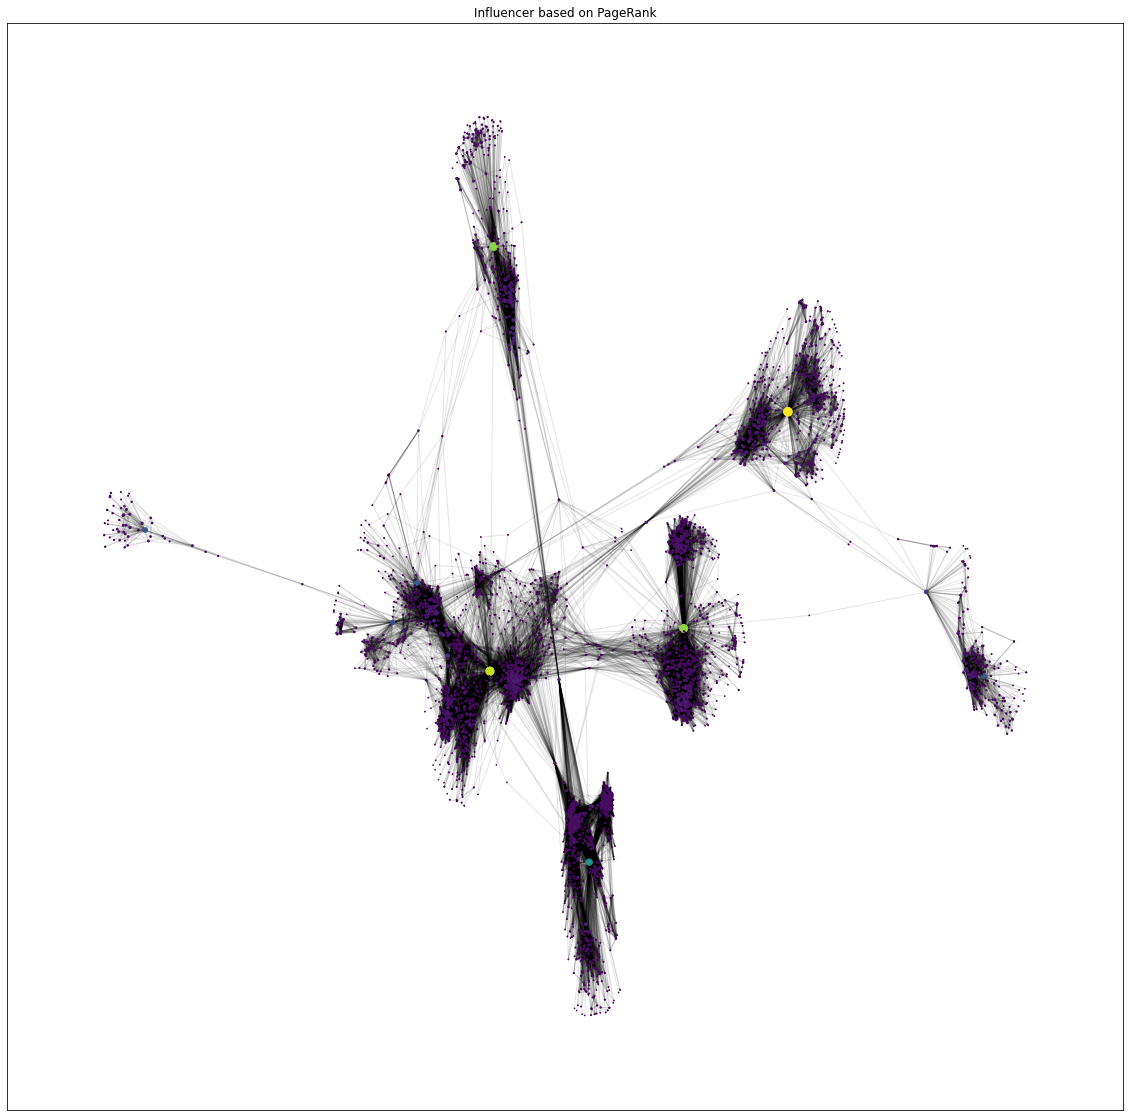

In [23]:
PR = nx.pagerank(G_fb)
pos = nx.spring_layout(G_fb)

node_color = [20000.0 * n_v for n_v in PR.values()]
node_size = [10000 * n_v for n_v in PR.values()]

plt.figure(figsize=(20,20))
plt.title('Influencer based on PageRank')
nx.draw_networkx_nodes(G_fb, pos=pos, node_color=node_color, node_size=node_size)
nx.draw_networkx_edges(G_fb, pos=pos, alpha=0.1)

In [24]:
PR_sorted = sorted(PR, key=PR.get, reverse=True)[:10]

print('The most influence nodes based on PageRank:')
for node in PR_sorted:
  print(node,'= {:.2f}'.format(PR[node]))

The most influence nodes based on PageRank:
3437 = 0.01
107 = 0.01
1684 = 0.01
0 = 0.01
1912 = 0.00
348 = 0.00
686 = 0.00
3980 = 0.00
414 = 0.00
698 = 0.00


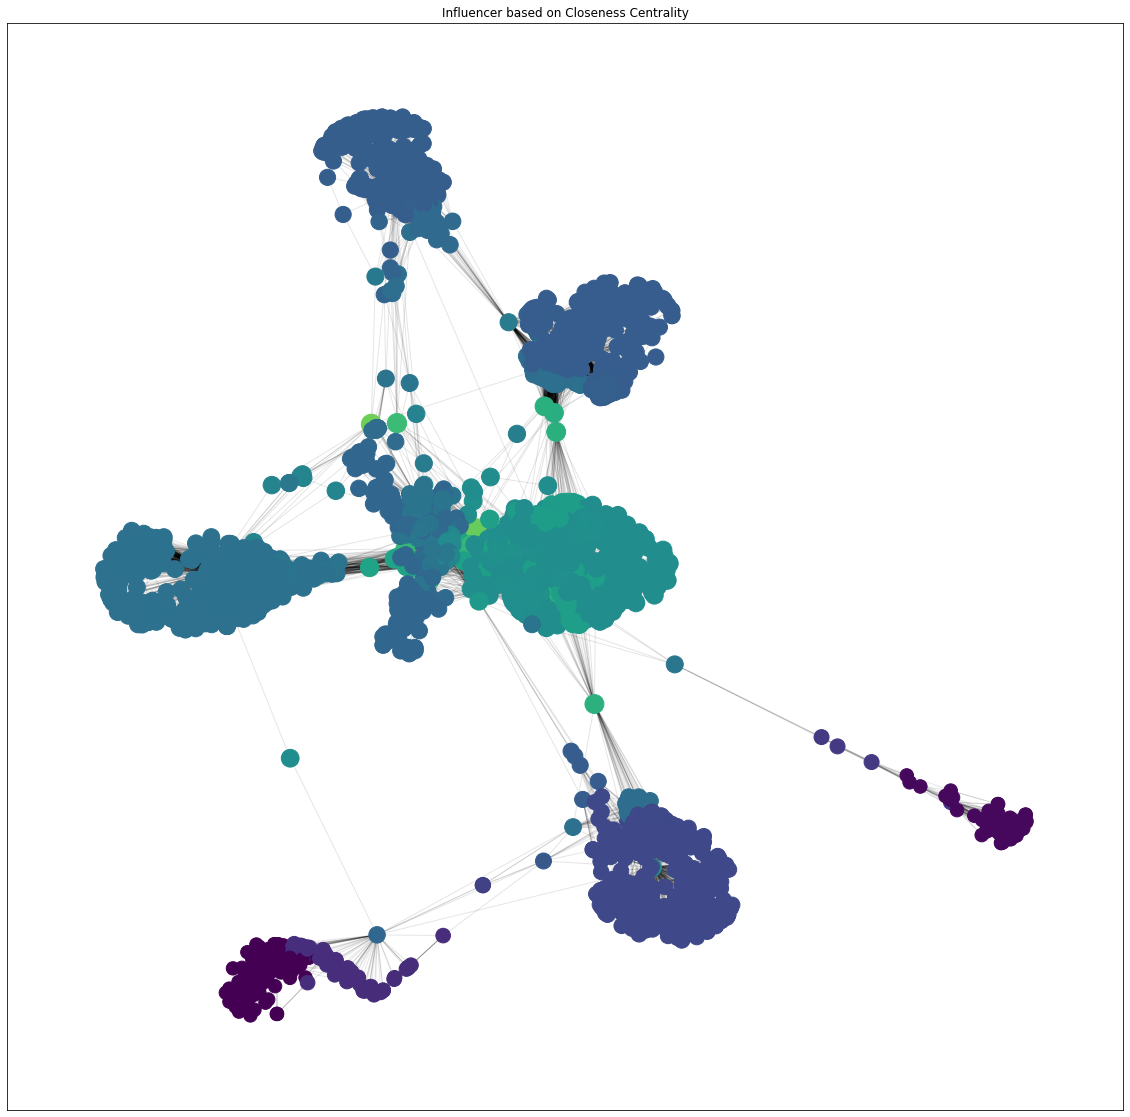

In [25]:
close = nx.closeness_centrality(G_fb)
pos = nx.spring_layout(G_fb)

node_color = [20000.0 * n_v for n_v in close.values()]
node_size = [1000 * n_v for n_v in close.values()]

plt.figure(figsize=(20,20))
plt.title('Influencer based on Closeness Centrality')
nx.draw_networkx_nodes(G_fb, pos=pos, node_color=node_color, node_size=node_size)
nx.draw_networkx_edges(G_fb, pos=pos, alpha=0.1)

In [26]:
close_sorted = sorted(close, key=close.get, reverse=True)[:10]

print('The most influence nodes based on Closeness Centrality:')
for node in close_sorted:
  print(node,'= {:.2f}'.format(close[node]))

The most influence nodes based on Closeness Centrality:
107 = 0.46
58 = 0.40
428 = 0.39
563 = 0.39
1684 = 0.39
171 = 0.37
348 = 0.37
483 = 0.37
414 = 0.37
376 = 0.37


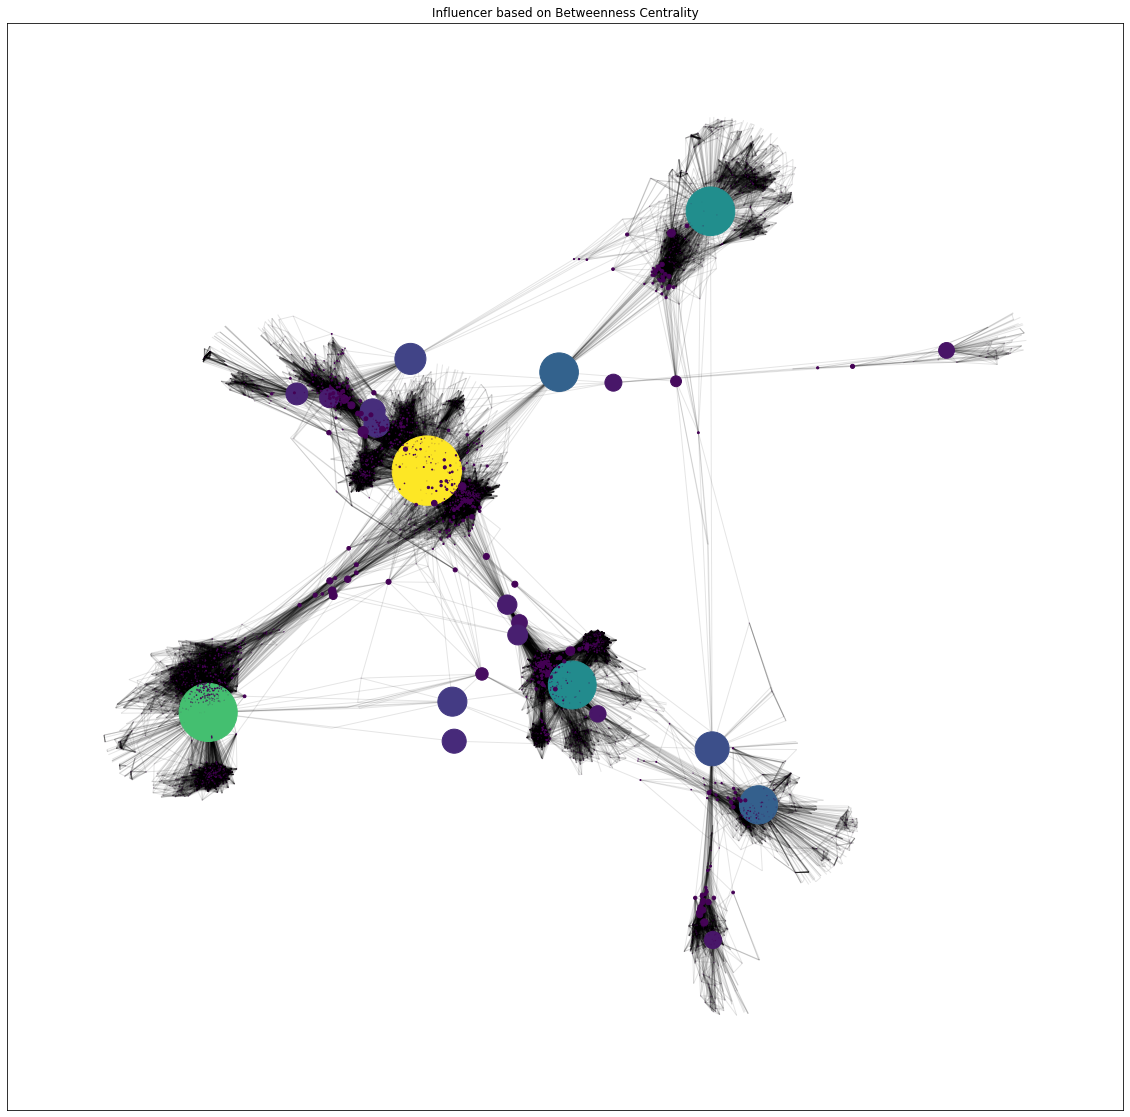

In [27]:
between = nx.betweenness_centrality(G_fb)
pos = nx.spring_layout(G_fb)

node_color = [20000.0 * n_v for n_v in between.values()]
node_size = [10000 * n_v for n_v in between.values()]

plt.figure(figsize=(20,20))
plt.title('Influencer based on Betweenness Centrality')
nx.draw_networkx_nodes(G_fb, pos=pos, node_color=node_color, node_size=node_size)
nx.draw_networkx_edges(G_fb, pos=pos, alpha=0.1)

In [28]:
between_sorted = sorted(between, key=between.get, reverse=True)[:10]

print('The most influence nodes based on Betweenness Centrality:')
for node in between_sorted:
  print(node,'= {:.2f}'.format(between[node]))

The most influence nodes based on Betweenness Centrality:
107 = 0.48
1684 = 0.34
3437 = 0.24
1912 = 0.23
1085 = 0.15
0 = 0.15
698 = 0.12
567 = 0.10
58 = 0.08
428 = 0.06


In [35]:
pd.Series(node_deg_sorted)

0     107
1    1684
2    1912
3    3437
4       0
5    2543
6    2347
7    1888
8    1800
9    1663
dtype: int64

In [50]:
df_top = pd.DataFrame(index=set(node_deg_sorted+eigen_sorted+PR_sorted+close_sorted+between_sorted))

df_top['Degree'] = pd.Series(neighbors).loc[node_deg_sorted]
df_top['PageRank'] = pd.Series(PR).loc[PR_sorted]
df_top['Closeness'] = pd.Series(close).loc[close_sorted]
df_top['Betweenness'] = pd.Series(between).loc[between_sorted]

df_top.dropna()

,Degree,PageRank,Closeness,Betweenness
1684,792.0,0.006367,0.393606,0.337797
107,1045.0,0.006936,0.459699,0.480518
